In [2]:
%pylab inline
from pygadgetreader import readsnap, readheader
import sys
import octopus
sys.path.insert(0, '../src/')

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:841: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/ngaravito/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())


Populating the interactive namespace from numpy and matplotlib


In [3]:
path = '../../LMC-MW/data/ICs/LMC/LMC1-97k/'
def N_body_orbit(snap_n, p_id):
    pos = readsnap(path +'LMC1_97K_vir_{:03d}'.format(snap_n), 'pos', 'dm')
    mass = readsnap(path +'LMC1_97K_vir_{:03d}'.format(snap_n), 'mass', 'dm')
    pid = readsnap(path +'LMC1_97K_vir_{:03d}'.format(snap_n), 'pid', 'dm')
    time = readheader(path +'LMC1_97K_vir_{:03d}'.format(snap_n), 'time')
    index_id = np.where(pid == p_id)[0]
    return pos[index_id], time

def particle_orbit(t, pid):
    N_snaps = 200
    particle_pos = np.zeros((N_snaps,3))
    time=0
    t_orb = np.zeros(N_snaps)
    i=0
    while time<t:
        particle_pos[i], t_orb[i] = N_body_orbit(i, pid)
        time = t_orb[i]
        i+=1
    #_pos = LMCMW_pos[index]
    #_vel = LMCMW_vel[index]
    return particle_pos[:i+1], t_orb[:i+1]

def particle_pos_vel(x, y, z, vx, vy, vz):
    """
    Finds the particle id of a a particle with the closest 
    given phase space coordinates.
    
    """
    pos = readsnap(path +'LMC1_97K_vir_000', 'pos', 'dm')
    vel = readsnap(path +'LMC1_97K_vir_000', 'vel', 'dm')
    pid = readsnap(path +'LMC1_97K_vir_000', 'pid', 'dm')
    #R = np.sqrt(LMCMW_pos[:,0]**2.0 + LMCMW_pos[:,1]**2.0 + LMCMW_pos[:,2]**2.0)
    #V = np.sqrt(LMCMW_vel[:,0]**2.0 + LMCMW_vel[:,1]**2.0 + LMCMW_vel[:,2]**2.0)
    x_dif = pos[:,0] - x
    y_dif = pos[:,1] - y
    z_dif = pos[:,2] - z
    

    space = np.sqrt(x_dif**2 + y_dif**2 + z_dif**2)
    index_pos = np.where(space<2)
    
    pid_space = pid[index_pos]
    pos_space = pos[index_pos]
    vel_space = vel[index_pos]
    
    vx_dif = vel_space[:,0] - vx
    vy_dif = vel_space[:,1] - vy
    vz_dif = vel_space[:,2] - vz
    
    velocity = np.sqrt(vx_dif**2 + vy_dif**2 + vz_dif**2)
    index_vel = np.argmin(velocity)

    
    return pid_space[index_vel], pos_space[index_vel, 0], pos_space[index_vel, 1], \
           pos_space[index_vel, 2], vel_space[index_vel, 0], vel_space[index_vel, 1], \
           vel_space[index_vel, 2]


In [4]:
p_ids, x_init, y_init, z_init, vx_init, vy_init, vz_init = particle_pos_vel(10, 0, 0, 0, 100, 0)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


In [5]:
particle_pos_vel(x_init, y_init, z_init, vx_init, vy_init, vz_init)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs


(48349, 10.489898, 0.35855523, 0.7413643, 9.1180515, 83.022125, 22.291983)

In [6]:
particle_nbody_orbit, t_orbit = particle_orbit(1, 48349)

Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Mass
Returning DM    Particle IDs
Returning DM

In [7]:
pos_cm_LMC, vel_cm_LMC, a, b = octopus.orbit('../../LMC-MW/data/ICs/LMC/LMC1-97k/', 'LMC1_97K_vir', 0, 100, 
                                             97000, 0.1, lmc=False, disk=False)

Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    Positions
Returning DM    Velocities
Returning DM    Particle IDs
Returning DM    

In [8]:
SCF_orbit = np.loadtxt('../src/orbit_LMC1_97k_test')

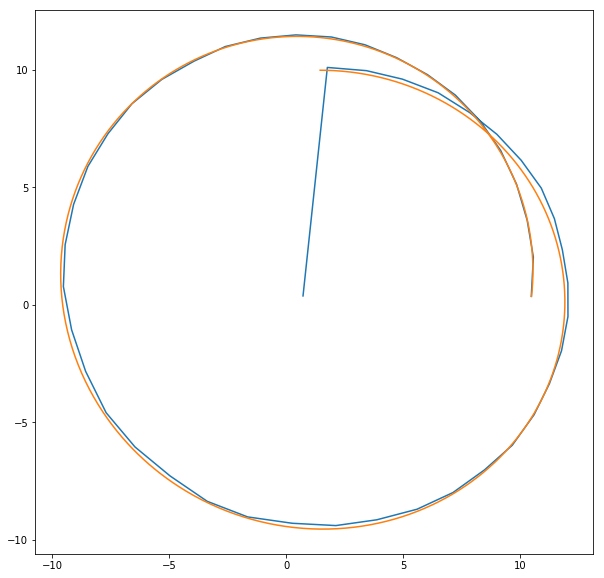

In [9]:
figure(figsize=(10,10))
plot(particle_nbody_orbit[:,0]-pos_cm_LMC[:len(particle_nbody_orbit),0], 
     particle_nbody_orbit[:,1]-pos_cm_LMC[:len(particle_nbody_orbit),1], label='N-body')

plot(SCF_orbit[:,1], SCF_orbit[:,2])